In [2]:
#assignment No:06

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphlib

In [3]:
bank_data.head()bank_data = pd.read_csv(r"c:\Users\Sanjivani Group\Desktop\ML_IT_317_DATASET\6.csv", sep=';')


bank_data['default'] = bank_data['default'].map({'no': 0, 'yes': 1, 'unknown': 0})
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})


bank_data.columns = bank_data.columns.str.replace('"', '')

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [7]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,no,no,cellular,6,feb,129,4,211,3,other,0
4520,44,entrepreneur,single,tertiary,0,1136,yes,yes,cellular,3,apr,345,2,249,7,other,0


In [6]:
bank_data.shape

(4521, 17)

In [5]:
# Split the data into X and y
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# categorical variables
X_encoded = pd.get_dummies(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Predict using the trained RandomForestClassifier model
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8906077348066298


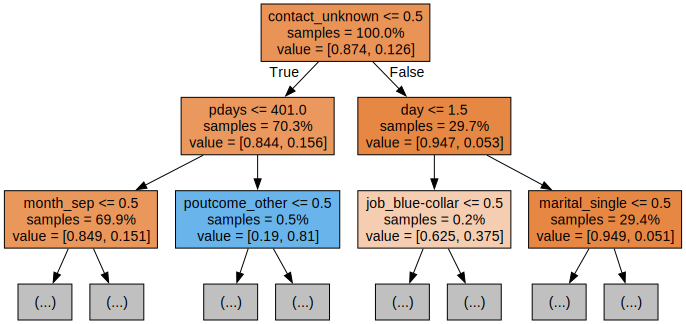

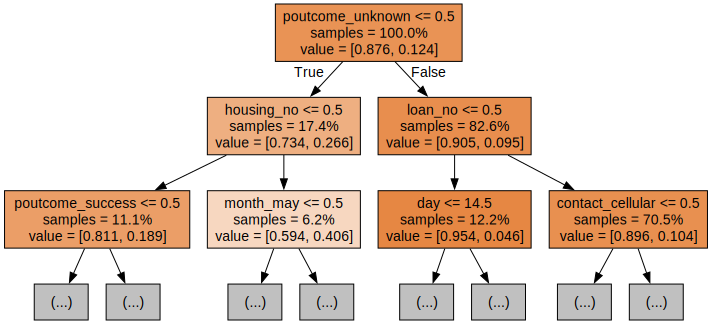

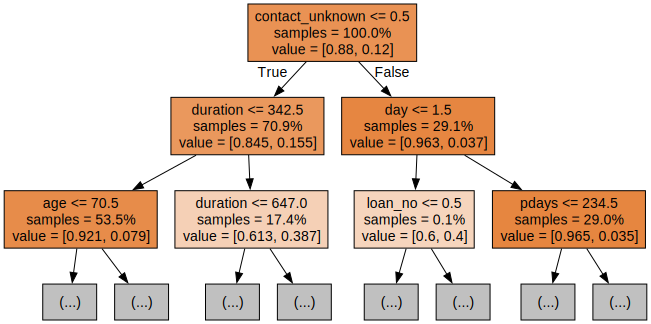

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A26EDABE10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A26EDAA410>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 434}


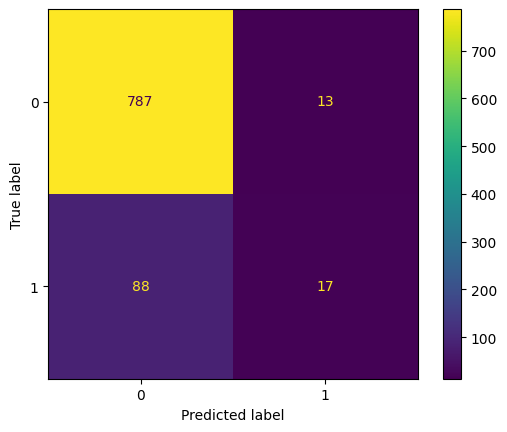

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

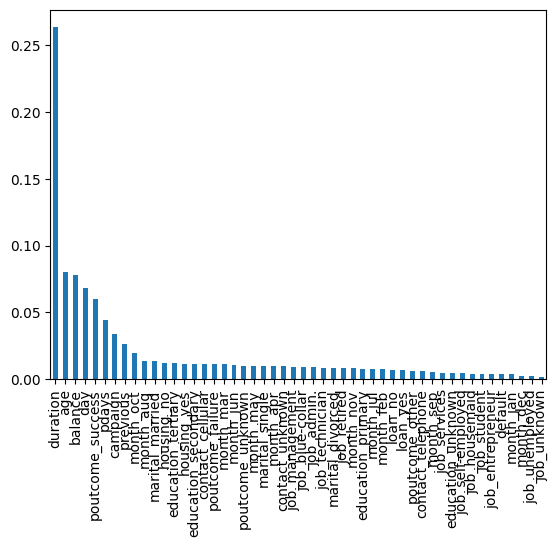

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();
